<a href="https://colab.research.google.com/github/Shubhamverse/CREDIT-CARD-DEFAULT-PREDICTION__Supervised-ML-Classification/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install shap

In [3]:
# Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
# Need to load JS vis in the notebook
shap.initjs()
% matplotlib inline

In [4]:
# pip install --upgrade xlrd

In [5]:
df = pd.read_excel('/content/drive/MyDrive/Alma Better(Data Science)/Capstone Projects/Supervised ML - Classification capstone project/Credit Card Default Prediction/default of credit card clients.xls',header = 1)

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [8]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [9]:
df.iloc[0,:]

ID                                1
LIMIT_BAL                     20000
SEX                               2
EDUCATION                         2
MARRIAGE                          1
AGE                              24
PAY_0                             2
PAY_2                             2
PAY_3                            -1
PAY_4                            -1
PAY_5                            -2
PAY_6                            -2
BILL_AMT1                      3913
BILL_AMT2                      3102
BILL_AMT3                       689
BILL_AMT4                         0
BILL_AMT5                         0
BILL_AMT6                         0
PAY_AMT1                          0
PAY_AMT2                        689
PAY_AMT3                          0
PAY_AMT4                          0
PAY_AMT5                          0
PAY_AMT6                          0
default payment next month        1
Name: 0, dtype: int64

In [10]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Preliminary EDA

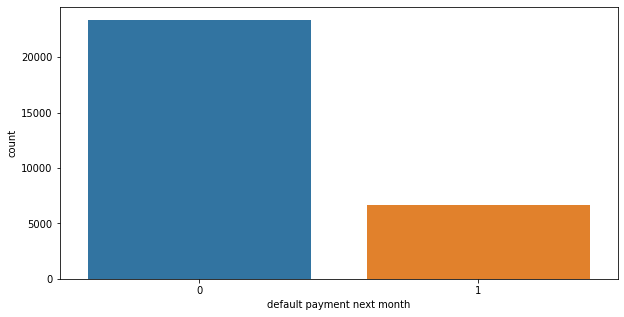

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'default payment next month', data = df)

# Seems to be quite imbalance

In [12]:

categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [13]:
df_cat = df[categorical_features]
df_cat['Defaulter'] = df['default payment next month']


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [14]:
df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


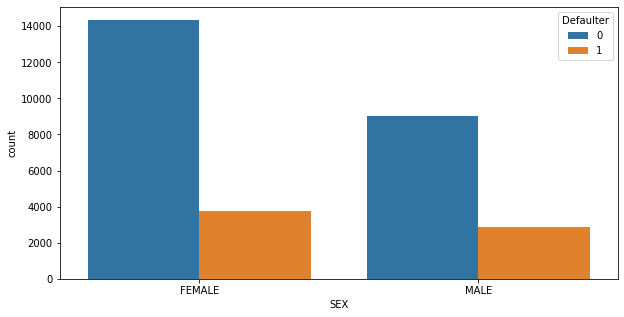

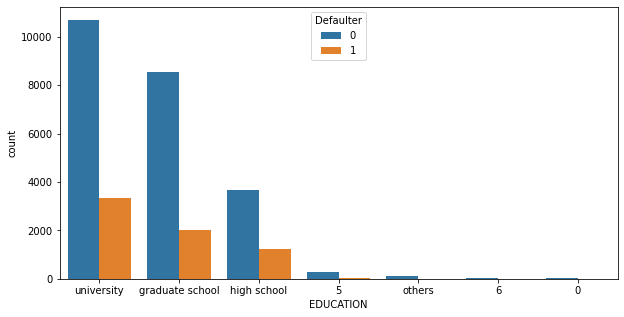

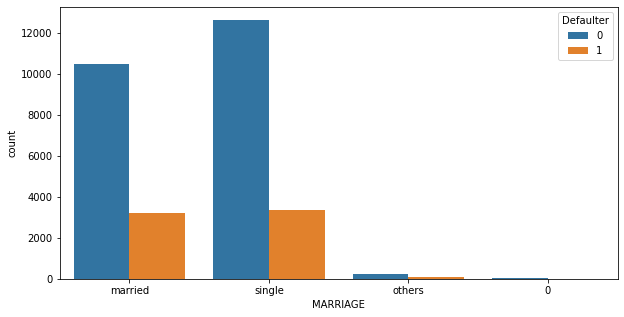

In [15]:
for col in categorical_features:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'Defaulter', data = df_cat)

In [16]:
df['LIMIT_BAL'].max()

1000000

In [17]:
df['LIMIT_BAL'].min()

10000

In [18]:
df.rename(columns={'default payment next month' : 'IsDefaulter'}, inplace=True)

In [19]:
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [20]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


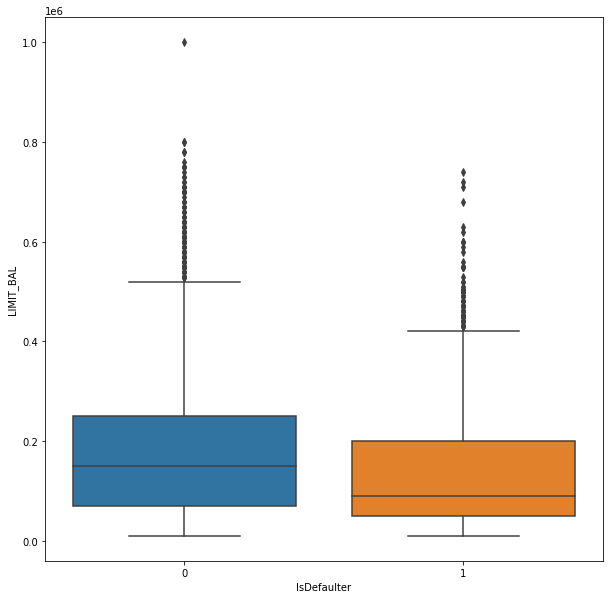

In [21]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="LIMIT_BAL", data=df)

In [22]:
df['AGE'].min()

21

In [23]:
df['AGE'].max()

79

In [24]:

df['IsDefaulter'].unique()

array([1, 0])

In [25]:
df['AGE']=df['AGE'].astype('int')

In [26]:
df.groupby('IsDefaulter')['AGE'].mean()

IsDefaulter
0    35.417266
1    35.725738
Name: AGE, dtype: float64

In [27]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [28]:
df = df.astype('int')

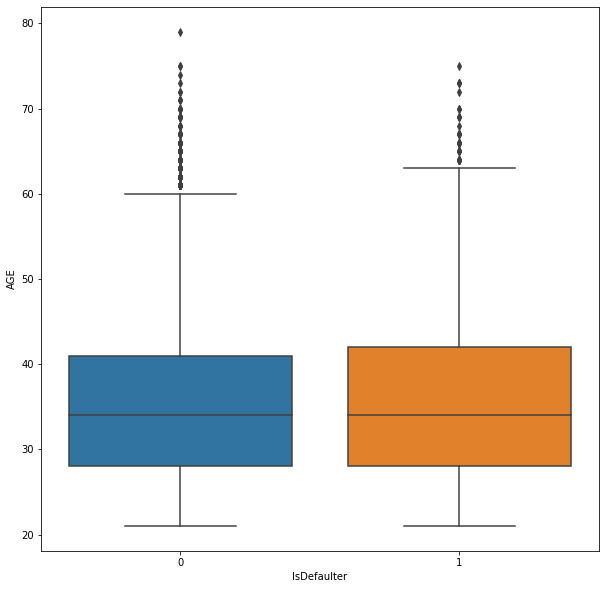

In [29]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="AGE", data=df)

In [30]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [31]:
X = df.drop('IsDefaulter', axis = 1)

In [32]:
bill_amnt_df = df[['BILL_AMT_SEPT',	'BILL_AMT_AUG',	'BILL_AMT_JUL',	'BILL_AMT_JUN',	'BILL_AMT_MAY',	'BILL_AMT_APR']]

In [ ]:
sns.pairplot(data = bill_amnt_df)

In [ ]:
pay_col = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'IsDefaulter', data = df)

In [ ]:
pay_amnt_df = df[['PAY_AMT_SEPT',	'PAY_AMT_AUG',	'PAY_AMT_JUL',	'PAY_AMT_JUN',	'PAY_AMT_MAY',	'PAY_AMT_APR', 'IsDefaulter']]

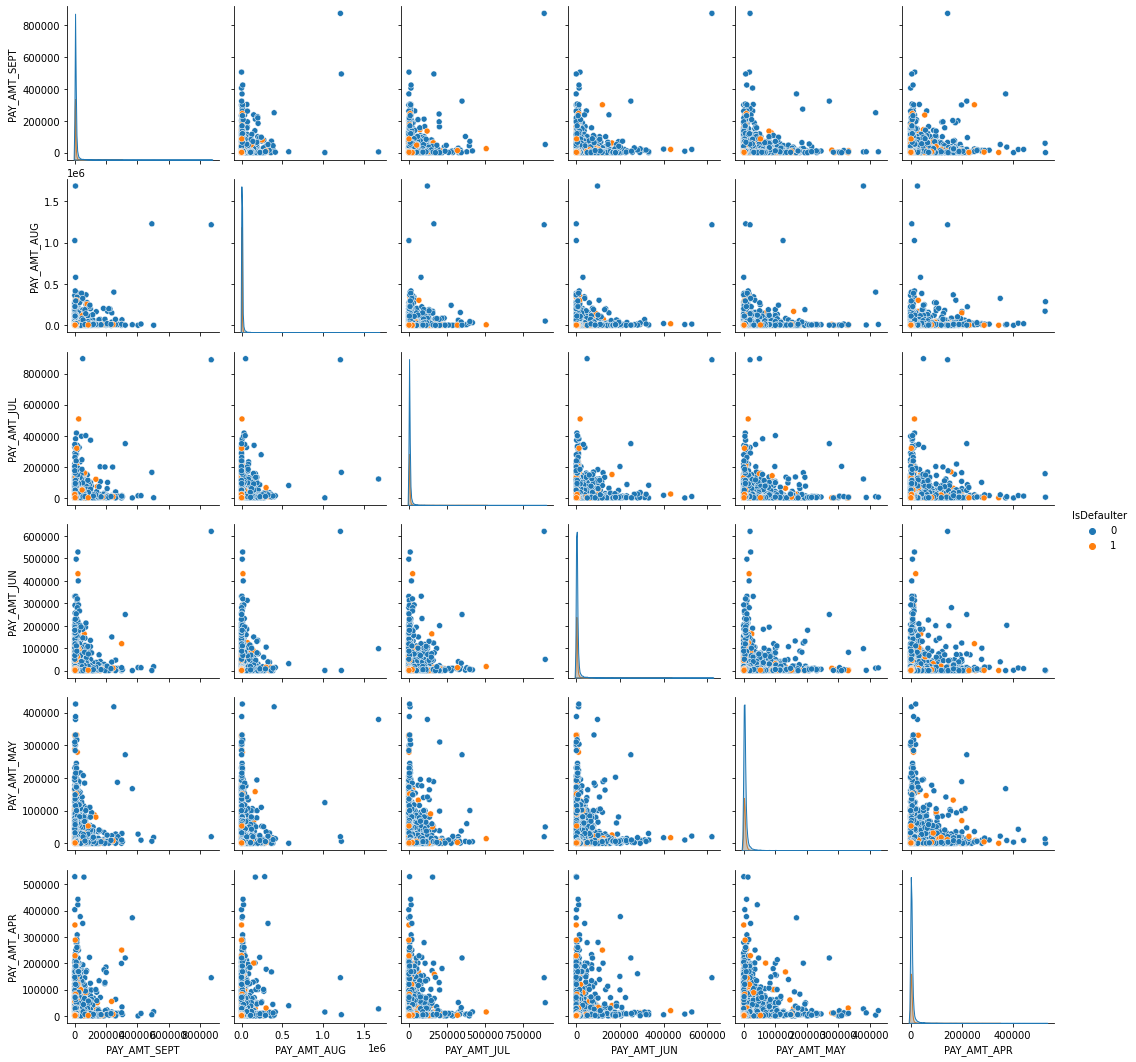

In [36]:
sns.pairplot(data = pay_amnt_df, hue='IsDefaulter')

In [37]:
df.shape

(30000, 25)

# Let's Try Using SMOTE(Synthetic Minority Oversampling Technique) to remediate Imbalance in dependent column.

In [38]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['IsDefaulter'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [39]:
x_smote

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,21897,166943,2,1,1,31,0,0,0,0,...,5036,5191,4927,1996,5370,3964,5630,6468,1483,14506
46724,23420,200000,2,1,1,34,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
46725,22507,50000,1,2,1,26,0,0,0,0,...,49874,11321,6180,43606,1332,2265,1313,586,38747,1745
46726,24133,126599,1,2,1,41,1,0,0,0,...,122881,123611,82904,83702,3960,5829,4340,3000,3040,3727


In [40]:
columns = list(df.columns)

In [41]:
columns.pop()

'IsDefaulter'

In [42]:
balance_df = pd.DataFrame(x_smote, columns=columns)

In [43]:
balance_df['IsDefaulter'] = y_smote

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


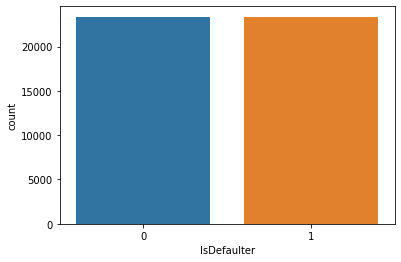

In [44]:
sns.countplot('IsDefaulter', data = balance_df)

In [45]:
balance_df[balance_df['IsDefaulter']==1]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
13,14,70000,1,2,2,30,1,2,2,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
16,17,20000,1,1,2,24,0,0,2,2,...,18338,17905,19104,3200,0,1500,0,1650,0,1
21,22,120000,2,2,1,39,-1,-1,-1,-1,...,0,632,316,316,316,0,632,316,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,21897,166943,2,1,1,31,0,0,0,0,...,5191,4927,1996,5370,3964,5630,6468,1483,14506,1
46724,23420,200000,2,1,1,34,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
46725,22507,50000,1,2,1,26,0,0,0,0,...,11321,6180,43606,1332,2265,1313,586,38747,1745,1
46726,24133,126599,1,2,1,41,1,0,0,0,...,123611,82904,83702,3960,5829,4340,3000,3040,3727,1


# Feature Engineering

In [46]:
df_fr = balance_df.copy()

In [47]:
df_fr['Payement_Value'] = df_fr['PAY_SEPT'] + df_fr['PAY_AUG'] + df_fr['PAY_JUL'] + df_fr['PAY_JUN'] + df_fr['PAY_MAY'] + df_fr['PAY_APR']

In [48]:
df_fr.groupby('IsDefaulter')['Payement_Value'].mean()

IsDefaulter
0   -1.98014
1    1.62378
Name: Payement_Value, dtype: float64

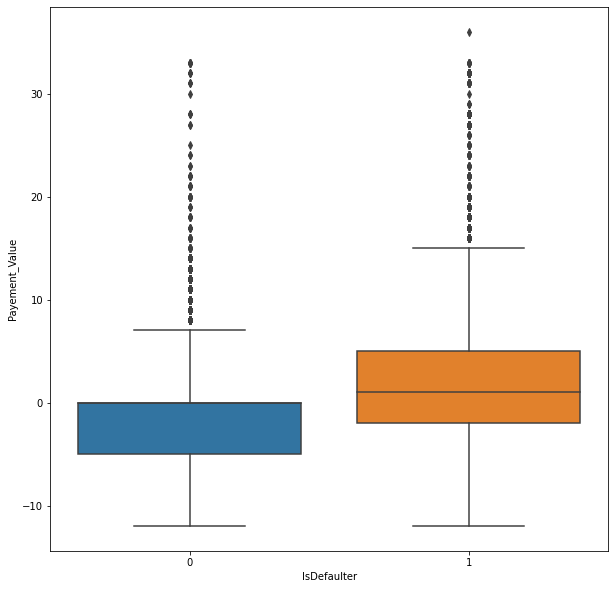

In [49]:
plt.figure(figsize=(10,10))
sns.boxplot(data = df_fr, x = 'IsDefaulter', y = 'Payement_Value' )

In [50]:
df_fr['Dues'] = (df_fr['BILL_AMT_APR']+df_fr['BILL_AMT_MAY']+df_fr['BILL_AMT_JUN']
                 +df_fr['BILL_AMT_JUL']+df_fr['BILL_AMT_SEPT'])-(df_fr['PAY_AMT_APR']+df_fr['PAY_AMT_MAY']
                                                                 +df_fr['PAY_AMT_JUN']+df_fr['PAY_AMT_JUL']+df_fr['PAY_AMT_AUG']+df_fr['PAY_AMT_SEPT'])

In [51]:
df_fr.groupby('IsDefaulter')['Dues'].mean()

IsDefaulter
0    187742.051532
1    195927.181604
Name: Dues, dtype: float64

In [52]:
df_fr['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [53]:
 
df_fr['EDUCATION']=np.where(df_fr['EDUCATION'] == 6, 4, df_fr['EDUCATION'])
df_fr['EDUCATION']=np.where(df_fr['EDUCATION'] == 0, 4, df_fr['EDUCATION'])

In [54]:
df_fr['MARRIAGE'].unique()

array([1, 2, 3, 0])

In [55]:
df_fr['MARRIAGE']=np.where(df_fr['MARRIAGE'] == 0, 3, df_fr['MARRIAGE'])

In [56]:
df_fr.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [57]:
df_fr.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter,Payement_Value,Dues
0,1,20000,FEMALE,university,married,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,-2,3913
1,2,120000,FEMALE,university,single,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,3,10352
2,3,90000,FEMALE,university,single,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,76608
3,4,50000,FEMALE,university,married,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,174713
4,5,50000,MALE,university,married,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,-2,44620


# One Hot Encoding

In [58]:
df_fr = pd.get_dummies(df_fr,columns=['EDUCATION','MARRIAGE'])

In [59]:
df_fr.head()

,ID,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,Payement_Value,Dues,EDUCATION_5,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,1,20000,FEMALE,24,2,2,-1,-1,-2,-2,...,-2,3913,0,0,0,0,1,1,0,0
1,2,120000,FEMALE,26,-1,2,0,0,0,2,...,3,10352,0,0,0,0,1,0,0,1
2,3,90000,FEMALE,34,0,0,0,0,0,0,...,0,76608,0,0,0,0,1,0,0,1
3,4,50000,FEMALE,37,0,0,0,0,0,0,...,0,174713,0,0,0,0,1,1,0,0
4,5,50000,MALE,57,-1,0,-1,0,0,0,...,-2,44620,0,0,0,0,1,1,0,0


In [60]:
df_fr.drop(['EDUCATION_others','MARRIAGE_others'],axis = 1, inplace = True)

In [61]:
df_fr = pd.get_dummies(df_fr, columns = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR'], drop_first = True )

In [62]:
df_fr.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,FEMALE,24,3913,3102,689,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,FEMALE,26,2682,1725,2682,3272,3455,3261,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,FEMALE,34,29239,14027,13559,14331,14948,15549,...,0,1,0,0,0,0,0,0,0,0
3,4,50000,FEMALE,37,46990,48233,49291,28314,28959,29547,...,0,1,0,0,0,0,0,0,0,0
4,5,50000,MALE,57,8617,5670,35835,20940,19146,19131,...,0,1,0,0,0,0,0,0,0,0


In [63]:
# LABEL ENCODING FOR SEX
encoders_nums = {
                 "SEX":{"FEMALE": 0, "MALE": 1}
}
df_fr = df_fr.replace(encoders_nums)

In [64]:
df_fr

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,0,24,3913,3102,689,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,0,26,2682,1725,2682,3272,3455,3261,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,0,34,29239,14027,13559,14331,14948,15549,...,0,1,0,0,0,0,0,0,0,0
3,4,50000,0,37,46990,48233,49291,28314,28959,29547,...,0,1,0,0,0,0,0,0,0,0
4,5,50000,1,57,8617,5670,35835,20940,19146,19131,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,21897,166943,0,31,7880,6931,5036,5191,4927,1996,...,0,1,0,0,0,0,0,0,0,0
46724,23420,200000,0,34,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46725,22507,50000,1,26,48301,48658,49874,11321,6180,43606,...,0,1,0,0,0,0,0,0,0,0
46726,24133,126599,1,41,120763,120718,122881,123611,82904,83702,...,0,1,0,0,0,0,0,0,0,0


In [67]:
df_fr.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,0,24,3913,3102,689,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,0,26,2682,1725,2682,3272,3455,3261,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,0,34,29239,14027,13559,14331,14948,15549,...,0,1,0,0,0,0,0,0,0,0
3,4,50000,0,37,46990,48233,49291,28314,28959,29547,...,0,1,0,0,0,0,0,0,0,0
4,5,50000,1,57,8617,5670,35835,20940,19146,19131,...,0,1,0,0,0,0,0,0,0,0


In [69]:
df_fr.to_csv('/content/drive/MyDrive/Alma Better(Data Science)/Capstone Projects/Supervised ML - Classification capstone project/Credit Card Default Prediction/Final_df.csv')

In [70]:
df_fr = pd.read_csv('/content/drive/MyDrive/Alma Better(Data Science)/Capstone Projects/Supervised ML - Classification capstone project/Credit Card Default Prediction/Final_df.csv')

In [71]:
df_fr.head()

,Unnamed: 0,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,0,1,20000,0,24,3913,3102,689,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,120000,0,26,2682,1725,2682,3272,3455,...,0,0,0,1,0,0,0,0,0,0
2,2,3,90000,0,34,29239,14027,13559,14331,14948,...,0,1,0,0,0,0,0,0,0,0
3,3,4,50000,0,37,46990,48233,49291,28314,28959,...,0,1,0,0,0,0,0,0,0,0
4,4,5,50000,1,57,8617,5670,35835,20940,19146,...,0,1,0,0,0,0,0,0,0,0


In [74]:
df_fr.drop(['Unnamed: 0'],axis = 1, inplace = True)

KeyError: ignored

# Implementing Logistic Regression

In [75]:
df_log_reg = df_fr.copy()

In [76]:
 from sklearn.preprocessing import StandardScaler

In [77]:
df_log_reg.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,0,24,3913,3102,689,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,0,26,2682,1725,2682,3272,3455,3261,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,0,34,29239,14027,13559,14331,14948,15549,...,0,1,0,0,0,0,0,0,0,0
3,4,50000,0,37,46990,48233,49291,28314,28959,29547,...,0,1,0,0,0,0,0,0,0,0
4,5,50000,1,57,8617,5670,35835,20940,19146,19131,...,0,1,0,0,0,0,0,0,0,0


In [78]:
X = df_log_reg.drop(['IsDefaulter','Payement_Value','Dues'],axis=1)
y = df_log_reg['IsDefaulter']

In [79]:
columns = X.columns

In [80]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [85]:
from sklearn.model_selection import GridSearchCV


In [86]:
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits



21 fits failed out of a total of 42.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

One or more of the test scores are no

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [87]:
optimized_clf = grid_lr_clf.best_estimator_

In [88]:
grid_lr_clf.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [89]:
grid_lr_clf.best_score_

0.7506309722791299

In [90]:
# Predicted Probability
train_preds = optimized_clf.predict_proba(X_train)[:,1]
test_preds = optimized_clf.predict_proba(X_test)[:,1]

In [91]:
# Get the predicted classes
train_class_preds = optimized_clf.predict(X_train)
test_class_preds = optimized_clf.predict(X_test)

In [92]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

In [93]:
# Get the accuracy scores
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.7524515284121762
The accuracy on test data is  0.7544257830231502


In [94]:
test_accuracy_lr = accuracy_score(test_class_preds,y_test)
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on train data is ", test_roc_score_lr)

The accuracy on test data is  0.7544257830231502
The precision on test data is  0.6936446173800259
The recall on test data is  0.7896057876864019
The f1 on test data is  0.7385210246495891
The roc_score on train data is  0.7582395265906571


[[12825  2828]
 [ 4922 10732]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

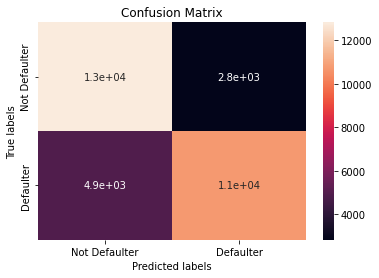

In [95]:
# Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [96]:
feature_importance = pd.DataFrame({'Features':columns, 'Importance':np.abs(optimized_clf.coef_).ravel() })

In [97]:
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

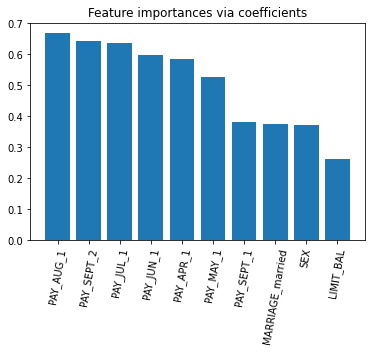

In [98]:

plt.bar(height=feature_importance['Importance'], x= feature_importance['Features'])
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()

In [99]:
y_preds_proba_lr = optimized_clf.predict_proba(X_test)[::,1]

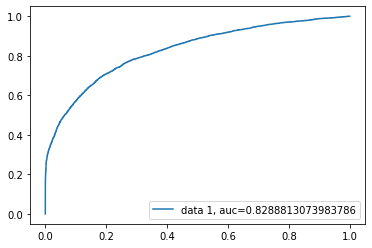

In [100]:
y_pred_proba = y_preds_proba_lr
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [101]:
# Need to load JS vis in the notebook
shap.initjs()

In [102]:
explainer = shap.Explainer(optimized_clf, X_train, feature_names=columns)
shap_values = explainer.shap_values(X_train)
i = 4776
shap.force_plot(explainer.expected_value, shap_values[i], features=X_train[4776], feature_names=columns)

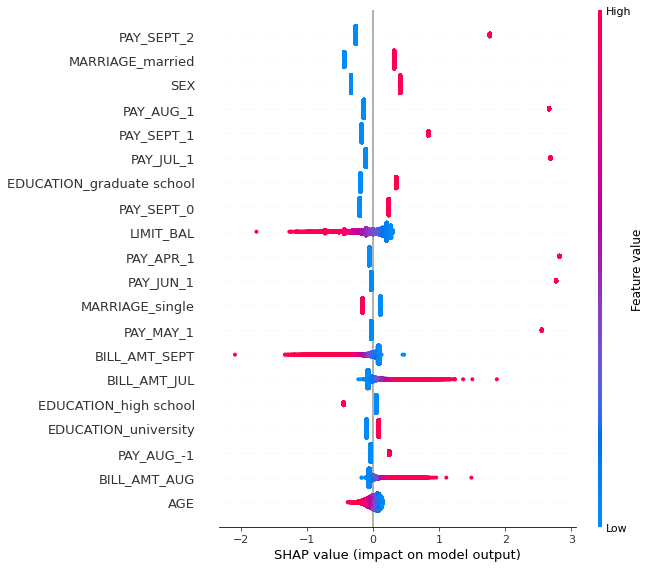

In [103]:
shap.summary_plot(shap_values, features=X_train, feature_names=columns)

# Implementing SVC

In [104]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],   
              'kernel': ['rbf']} 

In [105]:
from sklearn.svm import SVC

In [106]:
X = df_fr.drop(['IsDefaulter','Payement_Value','Dues'],axis=1)
y = df_fr['IsDefaulter']

In [107]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
grid_clf = GridSearchCV(SVC(probability = True), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


In [ ]:
  optimal_SVC_clf = grid_clf.best_estimator_

In [ ]:
grid_clf.best_params_

In [ ]:
grid_clf.best_score_

In [ ]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_SVC = accuracy_score(train_class_preds,y_train)
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_SVC)
print("The accuracy on test data is ", test_accuracy_SVC)

In [ ]:
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)
test_precision_score_SVC = precision_score(test_class_preds,y_test)
test_recall_score_SVC = recall_score(test_class_preds,y_test)
test_f1_score_SVC = f1_score(test_class_preds,y_test)
test_roc_score_SVC = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_SVC)
print("The precision on test data is ", test_precision_score_SVC)
print("The recall on test data is ", test_recall_score_SVC)
print("The f1 on test data is ", test_f1_score_SVC)
print("The roc_score on train data is ", test_roc_score_SVC)

In [ ]:
  # Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
/content/drive/MyDrive/Alma Submission/AlmaBetter/Cohort Aravali/Module 4/Week 2/Day 1

In [ ]:
import torch

In [ ]:
model_save_name = 'SVC_optimized_classifier.pt'
path = F"/content/drive/MyDrive/Alma Submission/AlmaBetter/Cohort Aravali/Module 4/Week 2/Day 1/{model_save_name}" 
torch.save(optimal_SVC_clf, path)

In [ ]:
model_save_name = 'SVC_optimized_classifier.pt'
path = F"/content/drive/MyDrive/Alma Submission/AlmaBetter/Cohort Aravali/Module 4/Week 2/Day 1/{model_save_name}"
optimal_SVC_clf = torch.load(path)

In [ ]:
optimal_SVC_clf

In [ ]:
y_pred_proba = optimal_SVC_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
y_preds_proba_SVC = y_pred_proba

# Implementing Decision Tree

In [ ]:
param_grid = {'max_depth': [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}

In [ ]:
from sklearn.tree import DecisionTreeClassifier  

In [ ]:
X = df_fr.drop(['IsDefaulter','Payement_Value','Dues'],axis=1)
y = df_fr['IsDefaulter']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
grid_DTC_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_DTC_clf.fit(X_train, y_train)

In [ ]:
grid_DTC_clf.best_score_

In [ ]:
optimal_DTC_clf = grid_DTC_clf.best_estimator_

In [ ]:
# Get the predicted classes
train_class_preds = optimal_DTC_clf.predict(X_train)
test_class_preds = optimal_DTC_clf.predict(X_test)

In [ ]:
grid_DTC_clf.best_params_

In [ ]:
# Get the accuracy scores
train_accuracy_DTC = accuracy_score(train_class_preds,y_train)
test_accuracy_DTC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_DTC)
print("The accuracy on test data is ", test_accuracy_DTC)

# Implementing RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = df_fr.drop(['IsDefaulter','Payement_Value','Dues'],axis=1)
y = df_fr['IsDefaulter']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

In [ ]:
# Get the predicted classes
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

In [ ]:
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on train data is ", test_roc_score_rf)

In [ ]:
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}

In [ ]:
grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_rf_clf.fit(X_train, y_train)

In [ ]:
grid_rf_clf.best_score_

In [ ]:
grid_rf_clf.best_params_

In [ ]:
optimal_rf_clf = grid_rf_clf.best_estimator_

In [ ]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

In [ ]:
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on train data is ", test_roc_score_rf)

In [ ]:
len(optimal_rf_clf.feature_importances_)

In [ ]:
# Feature Importance
feature_importances_rf = pd.DataFrame(optimal_rf_clf.feature_importances_,
                                   index = columns,
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],
        color="g",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
model_save_name = 'rf_optimized_classifier.pt'
path = F"/content/drive/MyDrive/Alma Submission/AlmaBetter/Cohort Aravali/Module 4/Week 2/Day 1/{model_save_name}" 
torch.save(optimal_rf_clf, path)

In [ ]:
model_save_name = 'rf_optimized_classifier.pt'
path = F"/content/drive/MyDrive/Alma Submission/AlmaBetter/Cohort Aravali/Module 4/Week 2/Day 1/{model_save_name}"
optimal_rf_clf = torch.load(path)

In [ ]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [ ]:
y_preds_proba_rf = optimal_rf_clf.predict_proba(X_test)[::,1]

In [ ]:
y_pred_proba = y_preds_proba_rf
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Implementing XGBoost 

In [ ]:
#import lightgbm and xgboost 
import lightgbm as lgb 
import xgboost as xgb

# Applying XGBoost 

In [ ]:
#The data is stored in a DMatrix object 
#label is used to define our outcome variable
dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test)

In [ ]:
#setting parameters for xgboost
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

In [ ]:
#training our model 
num_round=50
from datetime import datetime 
start = datetime.now() 
xg=xgb.train(parameters,dtrain,num_round) 
stop = datetime.now()

In [ ]:
#Execution time of the model 
execution_time_xgb = stop-start 
execution_time_xgb

In [ ]:
#now predicting our model on train set 
train_class_preds_probs=xg.predict(dtrain) 
#now predicting our model on test set 
test_class_preds_probs =xg.predict(dtest) 

In [ ]:
len(train_class_preds_probs)

In [ ]:
train_class_preds = []
test_class_preds = []
for i in range(0,len(train_class_preds_probs)):
  if train_class_preds_probs[i] >= 0.5:
    train_class_preds.append(1)
  else:
    train_class_preds.append(0)

for i in range(0,len(test_class_preds_probs)):
  if test_class_preds_probs[i] >= 0.5:
    test_class_preds.append(1)
  else:
    test_class_preds.append(0)

In [ ]:
test_class_preds_probs[:20]

In [ ]:
test_class_preds[:20]

In [ ]:
len(y_train)

In [ ]:
len(train_class_preds)

In [ ]:
# Get the accuracy scores
train_accuracy_xgb = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", test_accuracy_xgb)

In [ ]:
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)
test_precision_xgb = precision_score(test_class_preds,y_test)
test_recall_score_xgb = recall_score(test_class_preds,y_test)
test_f1_score_xgb = f1_score(test_class_preds,y_test)
test_roc_score_xgb = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb)
print("The precision on test data is ", test_precision_xgb)
print("The recall on test data is ", test_recall_score_xgb)
print("The f1 on test data is ", test_f1_score_xgb)
print("The roc_score on train data is ", test_roc_score_xgb)

# Hyperparameter Tuning

In [ ]:
from xgboost import  XGBClassifier

In [ ]:
X = df_fr.drop(['IsDefaulter','Payement_Value','Dues'],axis=1)
y = df_fr['IsDefaulter']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=-1,iid=False, cv=3, verbose = 2)
gsearch1.fit(X_train, y_train)

In [ ]:
 gsearch1.best_score_

In [ ]:
optimal_xgb = gsearch1.best_estimator_

In [ ]:
# Get the predicted classes
train_class_preds = optimal_xgb.predict(X_train)
test_class_preds = optimal_xgb.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_xgb_tuned = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb_tuned)
print("The accuracy on test data is ", test_accuracy_xgb_tuned)

In [ ]:
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)
test_precision_xgb_tuned = precision_score(test_class_preds,y_test)
test_recall_score_xgb_tuned = recall_score(test_class_preds,y_test)
test_f1_score_xgb_tuned = f1_score(test_class_preds,y_test)
test_roc_score_xgb_tuned = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb_tuned)
print("The precision on test data is ", test_precision_xgb_tuned)
print("The recall on test data is ", test_recall_score_xgb_tuned)
print("The f1 on test data is ", test_f1_score_xgb_tuned)
print("The roc_score on train data is ", test_roc_score_xgb_tuned)

In [ ]:
pd.DataFrame(optimal_xgb.feature_importances_,
                                   index = columns,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]

In [ ]:
# Feature Importance
feature_importances_xgb = pd.DataFrame(optimal_xgb.feature_importances_,
                                   index = columns,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_xgb.index, feature_importances_xgb['importance_xgb'],
        color="b",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
y_preds_proba_xgb = optimal_xgb.predict_proba(X_test)[::,1]

In [ ]:
y_pred_proba = y_preds_proba_xgb
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
model_save_name = 'xgb_optimized_classifier.pt'
path = F"/content/drive/MyDrive/Alma Submission/AlmaBetter/Cohort Aravali/Module 4/Week 2/Day 1/{model_save_name}" 
torch.save(optimal_xgb, path)

In [ ]:
model_save_name = 'xgb_optimized_classifier.pt'
path = F"/content/drive/MyDrive/Alma Submission/AlmaBetter/Cohort Aravali/Module 4/Week 2/Day 1/{model_save_name}" 
optimal_xgb = torch.load(path)

# Evaluating the models

In [ ]:
recall_score

In [ ]:
classifiers = ['Logistic Regression', 'SVC', 'Random Forest CLf', 'Xgboost Clf']
train_accuracy = [train_accuracy_lr, train_accuracy_SVC, train_accuracy_rf, train_accuracy_xgb_tuned]
test_accuracy = [test_accuracy_lr, test_accuracy_SVC, test_accuracy_rf, test_accuracy_xgb_tuned]
precision_score = [test_precision_score_lr, test_precision_score_SVC, test_precision_score_rf, test_precision_xgb_tuned]
recall_score = [test_recall_score_lr, test_recall_score_SVC, test_recall_score_rf, test_recall_score_xgb_tuned]
f1_score = [test_f1_score_lr, test_f1_score_SVC, test_f1_score_rf, test_f1_score_xgb_tuned]

In [ ]:
pd.DataFrame({'Classifier':classifiers, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Precision Score': precision_score, 'Recall Score': recall_score, 'F1 Score': f1_score })

# Plotting ROC AUC for all the models

In [ ]:
classifiers_proba = [(optimized_clf, y_preds_proba_lr), 
               (optimal_rf_clf, y_preds_proba_rf), 
               (optimal_xgb, y_preds_proba_xgb),
               (optimal_SVC_clf, y_preds_proba_SVC)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

In [ ]:
result_table

In [ ]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()